# Predicción de precios de automóviles

Utilizando el Modelo de Regresión Lineal Múltiple se predecirá el valor del precio de distintos automóviles en base a sus distintas características.

Se cuenta con una base de datos que cuenta con las siguientes entradas de cada vehículo:

<ul>
    <li>Marca (Brand)</li>
    <li>Precio (Price) ------------ Variable a predecir </li>
    <li>Tipo (Body)</li>
    <li>Millas recorridas (Mileage)</li>
    <li>Motor (EngineV)</li>
    <li>Tipo de motor (Engine Type)</li>
    <li>Año (Year)</li>
    <li>Modelo (Model)</li>    
</ul>

## Importando librerías relevantes

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Modelo de regresión lineal

### Declarando entradas y targets

In [2]:
# El target o variable dependiente es el logaritmo del precio ('log price')
datos_preprocesados = pd.read_csv('Datos preprocesados.csv')
targets = datos_preprocesados['log_price']

# Para obtener la tabla de entradas (inputs) simplemente eliminamos 'log price' de la tabla de datos
inputs = datos_preprocesados.drop(['log_price'],axis=1)

### Escalando los datos

In [3]:
# Importamos el modulo de escalado
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

escalador.fit(inputs)

StandardScaler()

In [4]:
# Escalamos los inputs y los guardamos en una nueva variable
inputs_escalados = escalador.transform(inputs)

### Separamos los datos en datos de entrenamiento y datos de testeo  (Train Test Split)

In [5]:
# Imporamos el modulo de train test split
from sklearn.model_selection import train_test_split

# Dividimos los datos en una relacion de 80% datos de entrenamiento y 20% datos de testeo
x_train, x_test, y_train, y_test = train_test_split(inputs_escalados, targets, test_size=0.2, random_state=42)

### Creamos la regresión

In [6]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [7]:
# llamamos 'y gorro' a las predicciones del modelo en base a los datos de entrenamiento
y_gorro = reg.predict(x_train)

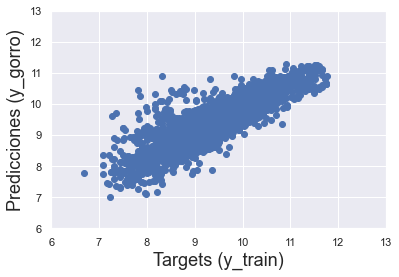

In [8]:
# graficamos los targets (y_train) y las predicciones del modelo (y_gorro) en un gráfico de dispersión.
# mientras más preciso el modelo, el gráfico de dispersión se ajustará más a una recta de 45 grados
plt.scatter(y_train, y_gorro)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predicciones (y_gorro)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion de los residuos')

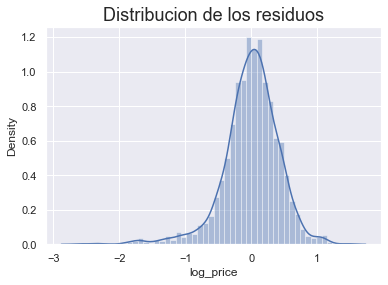

In [9]:
# Podemos realizar un gráfico de residuos de las predicciones y los targets
sns.distplot(y_train - y_gorro)

plt.title("Distribucion de los residuos", size=18)

# En el mejor escenario, los datos debiesen distribuirse normal
# Del grafico podemos notar que existen muchos residuos aislados en el extremo izquierdo
# por lo tanto, existe un margen de mejora para el modelo

In [10]:
# Obtenemos el R cuadrado del modelo
reg.score(x_train,y_train)

0.7546551936517909

### Obtención de los coeficientes e intercepto de las variables

In [11]:
# Intercepto
reg.intercept_

9.420992060408132

In [12]:
# Coeficientes
reg.coef_

array([ 0.0022103 , -0.46807443,  0.21528526,  0.01096395,  0.00554559,
       -0.14248224, -0.18774674, -0.06535765, -0.09905827, -0.13974369,
       -0.09377557, -0.17889981, -0.11453234, -0.15660246, -0.11682337,
       -0.02570221, -0.15107525,  0.31437596])

In [13]:
# Creamos un sumario de la regresión con los coeficientes e intercepto de cada una de las variables
reg_sumario = pd.DataFrame(inputs.columns.values, columns=['Variables'])
reg_sumario['Coeficientes'] = reg.coef_
reg_sumario

,Variables,Coeficientes
0,Unnamed: 0,0.002210
1,Mileage,-0.468074
2,EngineV,0.215285
3,Brand_BMW,0.010964
4,Brand_Mercedes-Benz,0.005546
5,Brand_Mitsubishi,-0.142482
6,Brand_Renault,-0.187747
7,Brand_Toyota,-0.065358
8,Brand_Volkswagen,-0.099058
9,Body_hatch,-0.139744


## Testeo

In [14]:
# Testeamos el modelo con los datos de testeo, es decir, datos que el modelo nunca ha visto
# esto nos permite saber si nuestro modelo es capaz de predecir nuevos datos
y_gorro_test = reg.predict(x_test)

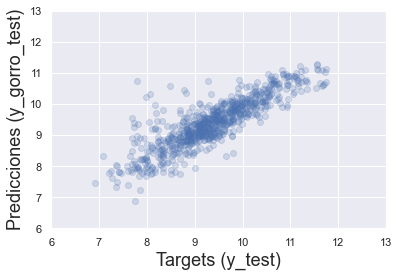

In [15]:
# Creamos un gráfico de dispersión con los targets de testeo y las predicciones de testeo
plt.scatter(y_test, y_gorro_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predicciones (y_gorro_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [16]:
# Podemos chequear las predicciones de forma manual.
# Puesto que los precios se predicen en forma logaritmica, debemos realizar la función inversa (exp)
df_pf = pd.DataFrame(np.exp(y_gorro_test), columns=['Prediccion'])
df_pf.head()

,Prediccion
0,40428.503799
1,7949.569403
2,5763.503646
3,9757.463291
4,7015.471946


In [17]:
# A nuestra tabla podemos agregar los targets de testeo (y_test)
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediccion,Target
0,40428.503799,21300.0
1,7949.569403,8900.0
2,5763.503646,3250.0
3,9757.463291,12000.0
4,7015.471946,5400.0
...,...,...
769,4708.462730,4200.0
770,9109.982947,8800.0
771,6275.065377,4850.0
772,20929.109784,27000.0


In [18]:
# Calculamos la diferencia entre los targets de testeo y las predicciones de testeo
df_pf['Residuos'] = df_pf['Target'] - df_pf['Prediccion']

In [19]:
# Finalmente, calculamos la diferencia, en porcentaje del valor real.
df_pf['Diferencia%'] = np.absolute(df_pf['Residuos']/df_pf['Target']*100)
df_pf

,Prediccion,Target,Residuos,Diferencia%
0,40428.503799,21300.0,-19128.503799,89.805182
1,7949.569403,8900.0,950.430597,10.678995
2,5763.503646,3250.0,-2513.503646,77.338574
3,9757.463291,12000.0,2242.536709,18.687806
4,7015.471946,5400.0,-1615.471946,29.916147
...,...,...,...,...
769,4708.462730,4200.0,-508.462730,12.106255
770,9109.982947,8800.0,-309.982947,3.522533
771,6275.065377,4850.0,-1425.065377,29.382791
772,20929.109784,27000.0,6070.890216,22.484779


In [20]:
# Exploramos las estadísticas descriptivas de nuestra tabla, en donde podemos obtener más insights.
df_pf.describe()

,Prediccion,Target,Residuos,Diferencia%
count,774.000000,774.000000,774.000000,774.000000
mean,16111.190241,17799.988992,1688.798751,42.090784
std,13326.467411,19723.434542,11189.039243,96.217020
min,966.794340,999.000000,-42889.795710,0.160496
25%,7459.282685,6700.000000,-2286.634503,11.159024
50%,11894.867516,11050.000000,-52.984220,24.037091
75%,20261.987931,20475.000000,3070.149864,42.312186
max,79171.948691,125000.000000,80899.493822,1787.074821


In [21]:
# Tambien podemos ver todas las predicciones de forma manual
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# podemos chequear las diferencias porcentuales en forma creciente para cada predicción y su respectivo valor real
df_pf.sort_values(by=['Diferencia%'])

,Prediccion,Target,Residuos,Diferencia%
387,13578.17,13600.00,21.83,0.16
425,3005.09,3000.00,-5.09,0.17
74,28969.75,28900.00,-69.75,0.24
314,35404.66,35500.00,95.34,0.27
336,11334.92,11300.00,-34.92,0.31
16,12253.38,12300.00,46.62,0.38
262,52281.16,52055.25,-225.91,0.43
456,3882.64,3900.00,17.36,0.45
581,11551.73,11500.00,-51.73,0.45
674,3114.69,3100.00,-14.69,0.47


### Conclusión

De la tabla anterior y el grafico de dispersion se infiere que en general, el modelo es capaz de predecir de buena manera los precios de los vehículos.


Se puede observar que el modelo tiende a sobreestimar los precios en los valores más bajos, lugar donde suceden las diferencias porcentuales más altas. Esto podría explicarse por la existencia de valores aislados que aún hayan faltado por eliminar. También puede existir la posibilidad de que algunos vehículos hayan estado dañados y no se haya tenido en cuenta esta información, o podrían existir mejores transformaciones de los datos a la hora de preprocesarlos.

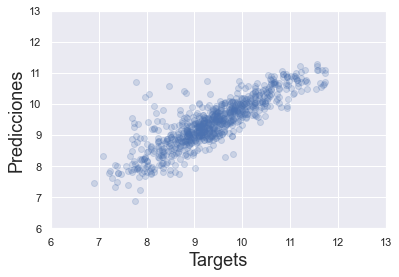

In [22]:
plt.scatter(y_test, y_gorro_test, alpha=0.2)
plt.xlabel('Targets',size=18)
plt.ylabel('Predicciones',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.savefig('Regresion.png', bbox_inches = "tight")
plt.show()
